In [105]:
#Installing pymysql
!pip install pymysql

In [106]:
#importing libraries
import pandas as pd
import numpy as np
import pymysql
import matplotlib.pyplot as plt
import seaborn as sns

In [107]:
#Connecting python and mysql
myconnection = pymysql.connect(host ='127.0.0.1',user='root',password ='Janasathy@15')

In [108]:
cursor = myconnection.cursor()
# Check if the database exists
db_name = 'project_guvi'
cursor.execute(f"SHOW DATABASES LIKE '{db_name}'")
result = cursor.fetchone()

# Create database if it doesn't exist
if not result:
    cursor.execute(f"CREATE DATABASE {db_name}")
    print(f"Database '{db_name}' created successfully!")
else:
    print(f"Database '{db_name}' already exists.")

Database 'project_guvi' already exists.


In [109]:
#view the dataframe
df1 = pd.read_csv("D://Jana//Project_Guvi//Customer Behavior Analysis//Datasets//customer_journey.csv")
df2 = pd.read_csv("D://Jana//Project_Guvi//Customer Behavior Analysis//Datasets//customer_reviews.csv")
df3 = pd.read_csv("D://Jana//Project_Guvi//Customer Behavior Analysis//Datasets//customers.csv")
df4 = pd.read_csv("D://Jana//Project_Guvi//Customer Behavior Analysis//Datasets//engagement_data.csv")
df5 = pd.read_csv("D://Jana//Project_Guvi//Customer Behavior Analysis//Datasets//geography.csv")
df6 = pd.read_csv("D://Jana//Project_Guvi//Customer Behavior Analysis//Datasets//products.csv")

In [110]:
#Replaceing NaN value as unknown because NaN value does not reflect in SQL table
df1['Duration'] = df1['Duration'].fillna(0)

In [111]:
df1.columns

Index(['JourneyID', 'CustomerID', 'ProductID', 'VisitDate', 'Stage', 'Action',
       'Duration'],
      dtype='object')

In [112]:
df1.dtypes

JourneyID       int64
CustomerID      int64
ProductID       int64
VisitDate      object
Stage          object
Action         object
Duration      float64
dtype: object

In [113]:
#Change the dtype python into SQL format(using automate)
dtype_mapping ={
    'int64':'INTEGER',
    'float64':'FLOAT',
    'object':'TEXT',
    'datetime64[ns]':'DATETIME',
    'bool':'BOOLEAN'
}
columns1 = ",".join(f"{col} {dtype_mapping[str(dtype)]}"for col,dtype in zip(df1.columns,df1.dtypes))
columns2 = ",".join(f"{col} {dtype_mapping[str(dtype)]}"for col,dtype in zip(df2.columns,df2.dtypes))
columns3 = ",".join(f"{col} {dtype_mapping[str(dtype)]}"for col,dtype in zip(df3.columns,df3.dtypes))
columns4 = ",".join(f"{col} {dtype_mapping[str(dtype)]}"for col,dtype in zip(df4.columns,df4.dtypes))
columns5 = ",".join(f"{col} {dtype_mapping[str(dtype)]}"for col,dtype in zip(df5.columns,df5.dtypes))
columns6 = ",".join(f"{col} {dtype_mapping[str(dtype)]}"for col,dtype in zip(df6.columns,df6.dtypes))

In [114]:
cursor.execute("truncate table project_guvi.customer_journey")
cursor.execute("truncate table project_guvi.customer_reviews")
cursor.execute("truncate table project_guvi.customers")
cursor.execute("truncate table project_guvi.engagement_data")
cursor.execute("truncate table project_guvi.geography")
cursor.execute("truncate table project_guvi.products")

##Inserting values into tables
for i in range(0,len(df1)):
   cursor.execute(f"insert into project_guvi.customer_journey values {tuple(df1.iloc[i])}")
   myconnection.commit()
for i in range(0,len(df2)):
   cursor.execute(f"insert into project_guvi.customer_reviews values {tuple(df2.iloc[i])}")
   myconnection.commit()
for i in range(0,len(df3)):
   cursor.execute(f"insert into project_guvi.customers values {tuple(df3.iloc[i])}")
   myconnection.commit()
for i in range(0,len(df4)):
   cursor.execute(f"insert into project_guvi.engagement_data values {tuple(df4.iloc[i])}")
   myconnection.commit()
for i in range(0,len(df5)):
   cursor.execute(f"insert into project_guvi.geography values {tuple(df5.iloc[i])}")
   myconnection.commit()
for i in range(0,len(df6)):
   cursor.execute(f"insert into project_guvi.products values {tuple(df6.iloc[i])}")
   myconnection.commit()

    

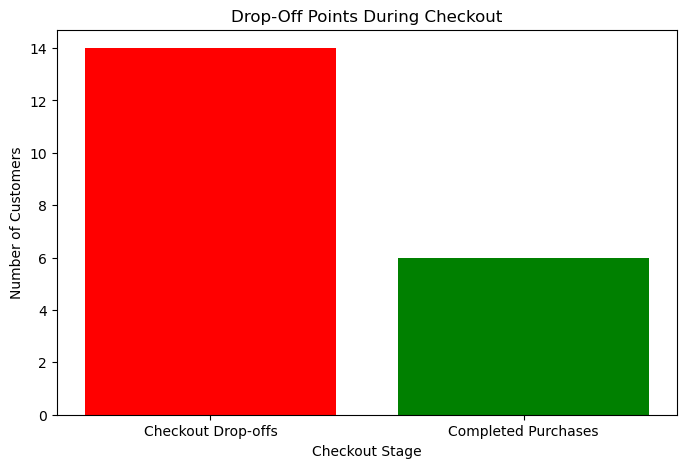

In [115]:
# Drop-off Data
stages = ['Checkout Drop-offs', 'Completed Purchases']
counts = [14, 6]

# Bar Plot
plt.figure(figsize=(8, 5))
plt.bar(stages, counts, color=['red', 'green'])
plt.title('Drop-Off Points During Checkout')
plt.xlabel('Checkout Stage')
plt.ylabel('Number of Customers')
plt.show()

C:\Users\ELCOT\AppData\Local\Temp\ipykernel_8556\1728097071.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=stages, y=time_spent, palette='Blues_d')


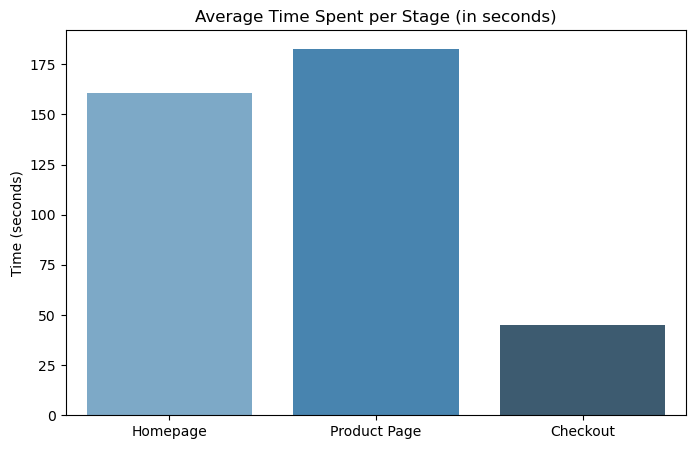

In [116]:
# Average time spent per stage Data
stages = ['Homepage', 'Product Page', 'Checkout']
time_spent = [160.53, 182.77, 45.05]

# Bar Plot
plt.figure(figsize=(8, 5))
sns.barplot(x=stages, y=time_spent, palette='Blues_d')
plt.title('Average Time Spent per Stage (in seconds)')
plt.ylabel('Time (seconds)')
plt.show()

C:\Users\ELCOT\AppData\Local\Temp\ipykernel_8556\1006425024.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=products, y=ratings, palette='viridis')


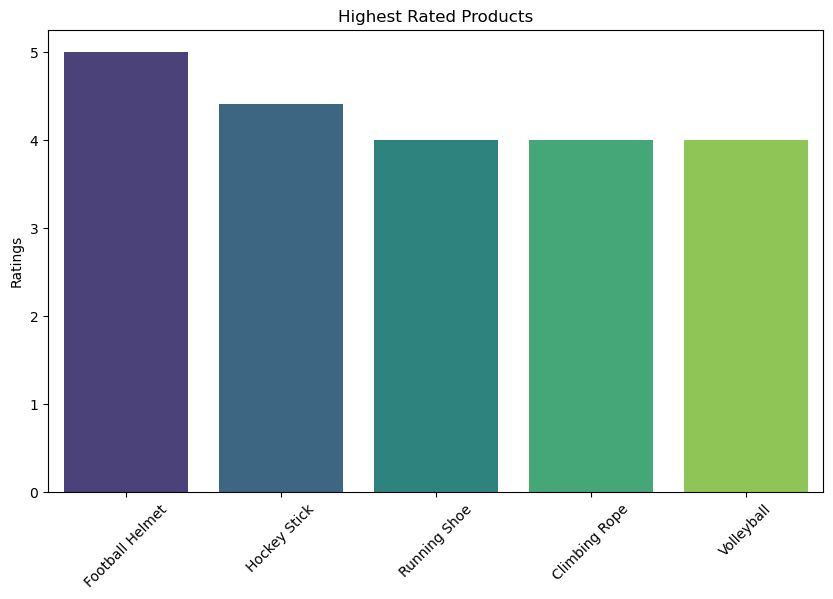

In [117]:
# Highest rated products Data
products = ['Football Helmet', 'Hockey Stick', 'Running Shoe', 'Climbing Rope', 'Volleyball']
ratings = [5.0, 4.4, 4.0, 4.0, 4.0]

# Seaborn Barplot
plt.figure(figsize=(10, 6))
sns.barplot(x=products, y=ratings, palette='viridis')
plt.title('Highest Rated Products')
plt.xticks(rotation=45)
plt.ylabel('Ratings')
plt.show()

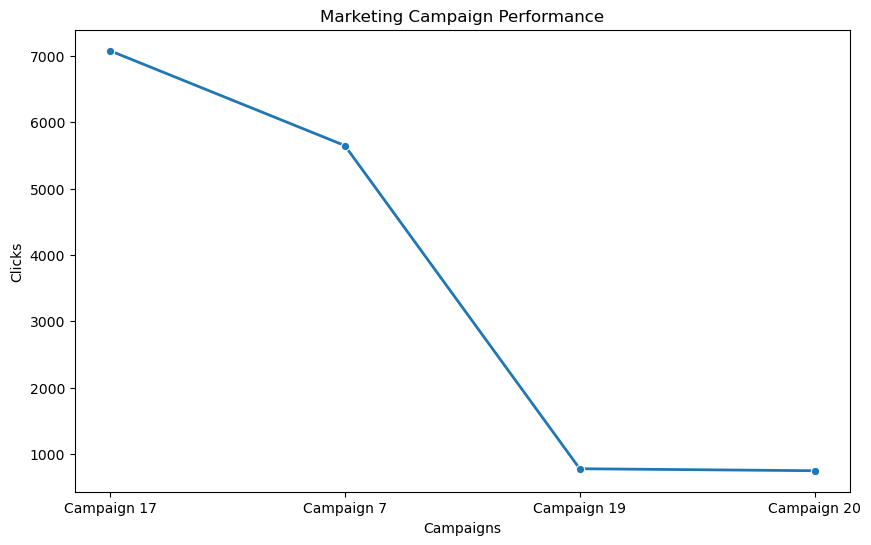

In [118]:
# Marketing campaigns Data
campaigns = ['Campaign 17', 'Campaign 7', 'Campaign 19', 'Campaign 20']
clicks = [7077, 5648, 780, 750]

# Line Plot
plt.figure(figsize=(10, 6))
sns.lineplot(x=campaigns, y=clicks, marker='o', linewidth=2)
plt.title('Marketing Campaign Performance')
plt.ylabel('Clicks')
plt.xlabel('Campaigns')
plt.show()